In [12]:
# MARK:- libs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# MARK:- preparation
NORMALIZED_DATASET_PATH = r'E:/Thesis/dss_court/module_dataset/dataset/processed_dataset/normalized.csv'

data_df = pd.read_csv(NORMALIZED_DATASET_PATH)
train_df = data_df.drop(columns=['decision'])
feature_l = train_df.columns
labels = data_df['decision'].tolist()

print(data_df.head())

legal_rela  plaintiff_age  defendant_age  decision  age_dist  has_children
0           4             26             27         1         1             1
1           8             29             29         1         0             1
2           1             24             24         0         0             1
3           1             24             27         1         3             1
4           3             27             32         0         5             1


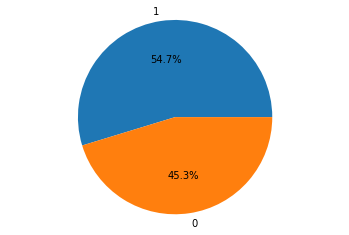

In [14]:
data_labels = data_df['decision']
plot_labels = {"0", "1"}
label_count = data_labels.value_counts()

plt.pie(label_count, labels=plot_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [15]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = data_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of cases': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data_df[[feature, 'decision']].groupby([feature],as_index=False).mean()
    
    cat_perc.sort_values(by='decision', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of cases",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='decision', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

def plot_many_stats(l_features, label_rotaion=True, horizontal_layout=True):
    for feature in l_features:
         plot_stats(feature, label_rotation=label_rotaion, horizontal_layout=horizontal_layout)

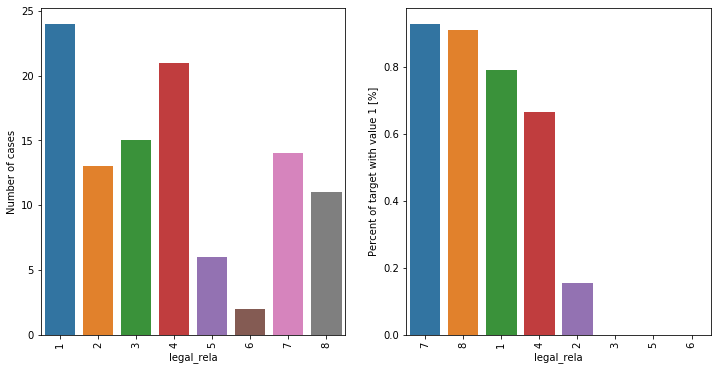

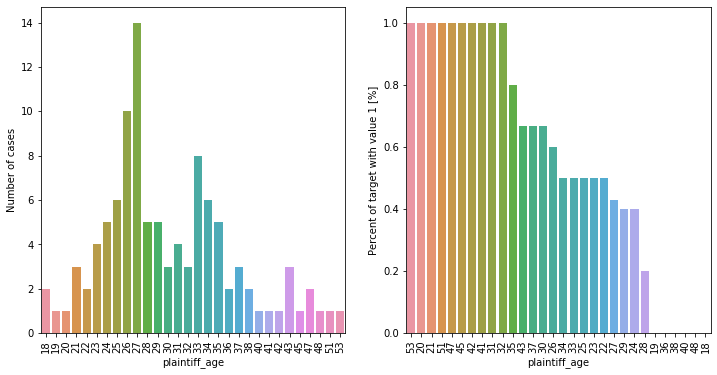

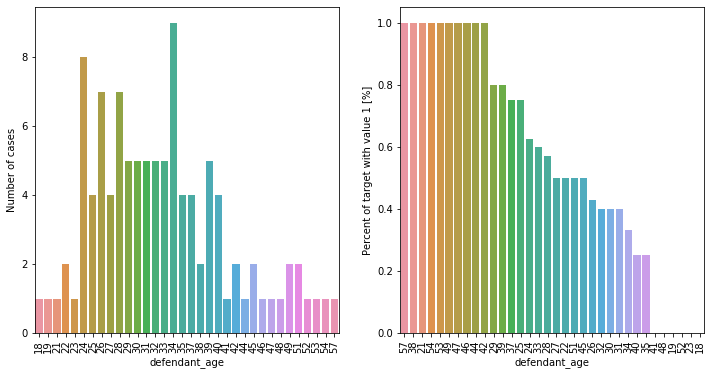

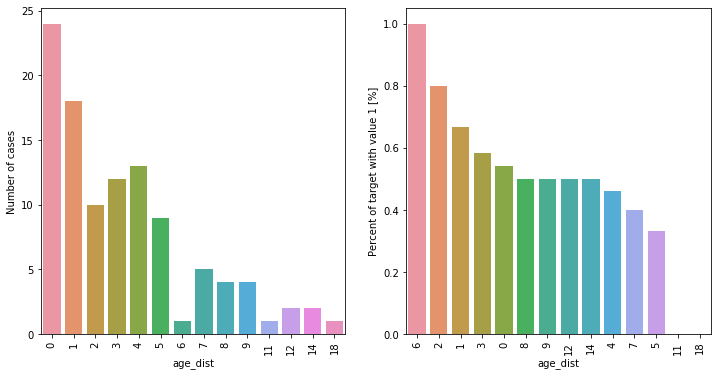

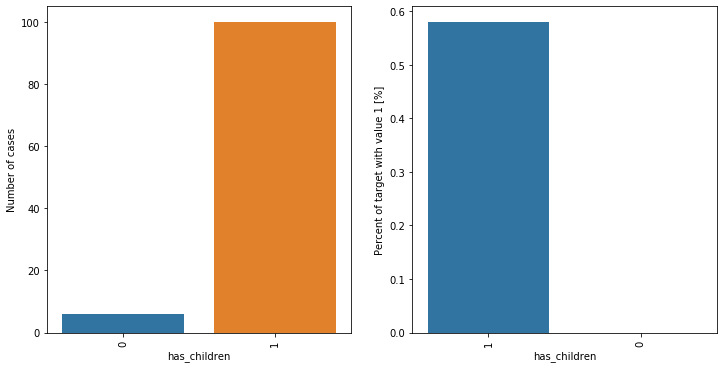

In [16]:
plot_many_stats(feature_l)